In [8]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import Audio

from modeling.transforms import *

In [5]:
sample = "/home/kpintaric/lumen-irmas/data/raw/IRMAS_Training_Data/cel/[cel][cla]0001__1.wav"

In [6]:
audio, sr = torchaudio.load(sample)
Audio(audio, rate=sr)

In [9]:
preprocess = PreprocessPipeline(16000)

In [25]:
preprocessed = preprocess(sample)

In [20]:
print(f"""
Before: {tuple(audio.shape)}, {type(audio)},\n 
After: {preprocess(sample).shape}, {type(preprocess(sample))}
      """)


Before: (2, 132299), <class 'torch.Tensor'>,
 
After: (1, 48000), <class 'numpy.ndarray'>
      


In [26]:
extract = FeatureExtractor(16000)

In [28]:
extracted = extract(preprocessed)

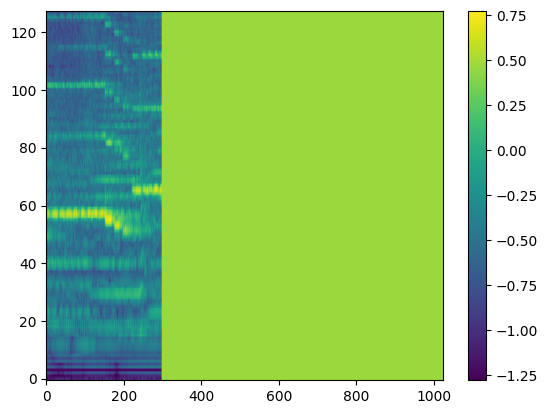

In [39]:
# Display the spectrogram using matplotlib with viridis color map and no axes
plt.imshow(extracted[0], aspect='auto', origin='lower', cmap='viridis')
plt.axis('on') # remove the x- and y-axis and tick labels
plt.colorbar() # adds a color bar to the plot
plt.show()

In [41]:
from modeling.utils import *

In [44]:
get_file_info("/home/kpintaric/lumen-irmas/data/test_notes/piano-c_C_major.wav", extract_music_features=True)

{'path': '/home/kpintaric/lumen-irmas/data/test_notes/piano-c_C_major.wav',
 'pitch': 6.270260171993512,
 'bpm': 42.71048553719008,
 'onset': 0.058049886621315196,
 'sample_rate': 44100,
 'duration': 1.540498866213152,
 'channels': 2}

In [45]:
np.exp(6.270260171993512)

528.6148907783431

In [46]:
get_file_info("/home/kpintaric/lumen-irmas/data/test_notes/vocal-breathy-note-c_120bpm_C.wav", extract_music_features=True)

{'path': '/home/kpintaric/lumen-irmas/data/test_notes/vocal-breathy-note-c_120bpm_C.wav',
 'pitch': 6.2601286874958735,
 'bpm': 303.99816176470586,
 'onset': 0.034829931972789115,
 'sample_rate': 44100,
 'duration': 1.0,
 'channels': 2}

In [84]:
piano_c = torch.tensor(preprocess("/home/kpintaric/lumen-irmas/data/test_notes/vocal-breathy-note-c_120bpm_C.wav"))
vocal_c = torch.tensor(preprocess("/home/kpintaric/lumen-irmas/data/test_notes/piano-c_C_major.wav"))
piano_d = torch.tensor(preprocess("/home/kpintaric/lumen-irmas/data/test_notes/piano-d_D_major.wav"))
piano_e = torch.tensor(preprocess("/home/kpintaric/lumen-irmas/data/test_notes/piano-note-e_E_major.wav"))

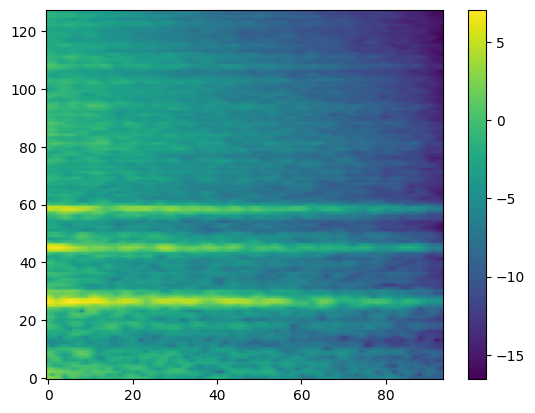

In [70]:
# Display the spectrogram using matplotlib with viridis color map and no axes
plt.imshow(np.log(spec(piano_c))[0], aspect='auto', origin='lower', cmap='viridis')
plt.axis('on') # remove the x- and y-axis and tick labels
plt.colorbar() # adds a color bar to the plot
plt.show()

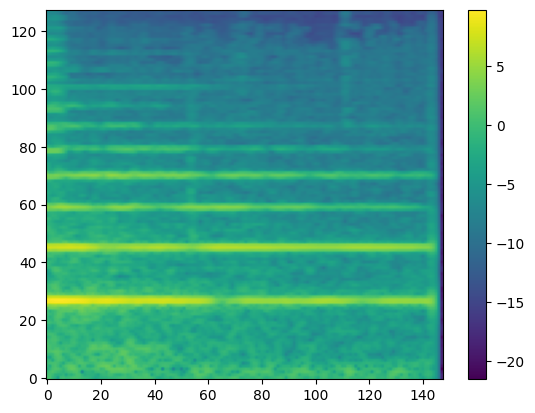

In [71]:
# Display the spectrogram using matplotlib with viridis color map and no axes
plt.imshow(np.log(spec(vocal_c))[0], aspect='auto', origin='lower', cmap='viridis')
plt.axis('on') # remove the x- and y-axis and tick labels
plt.colorbar() # adds a color bar to the plot
plt.show()

In [82]:
import librosa

# Define the parameters of the mel spectrogram
n_mels = 128
hop_length = 160
n_fft = 1024
sr = 16000
fmin = 20
fmax = sr/2

# Compute the mel scale frequencies
mel_frequencies = librosa.mel_frequencies(n_mels=n_mels, fmin=fmin, fmax=fmax)

# Compute the mel scale value of 523 Hz
f = 659
m = 2595 * np.log10(1 + f/700)

# Compute the index of the closest mel bin
fmin_mel = 0
fmax_mel = 2595 * np.log10(1 + fmax/700)
fbin_mel = (fmax_mel - fmin_mel) / (n_mels - 1)
bin_index = int(round((m - fmin_mel) / fbin_mel))

print('The 523 Hz frequency is closest to mel bin index', bin_index)

The 523 Hz frequency is closest to mel bin index 33


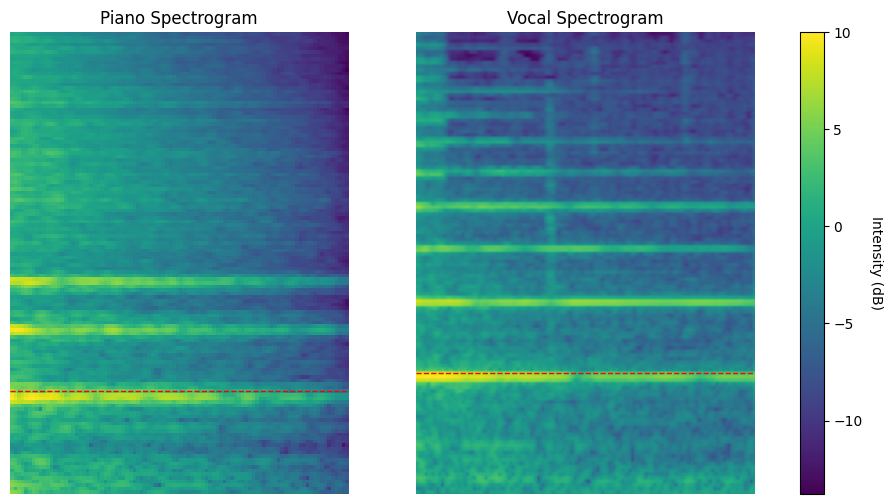

In [83]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot the first spectrogram in the left subplot
im1 = ax1.imshow(np.log(spec(piano_c))[0], aspect='auto', origin='lower', cmap='viridis')
ax1.axis('off') # remove the x- and y-axis and tick labels
ax1.set_title('Piano Spectrogram')

# plot the second spectrogram in the right subplot
im2 = ax2.imshow(np.log(spec(piano_e))[0], aspect='auto', origin='lower', cmap='viridis')
ax2.axis('off') # remove the x- and y-axis and tick labels
ax2.set_title('Vocal Spectrogram')

# add a horizontal line at 523 Hz to each subplot

ax1.axhline(y=28, color='red', linestyle='--', linewidth=1)
ax2.axhline(y=33, color='red', linestyle='--', linewidth=1)

# add a color bar to the figure
cbar = plt.colorbar(im2, ax=[ax1, ax2])
cbar.ax.set_ylabel('Intensity (dB)', rotation=270, labelpad=15)

# display the figure
plt.show()

In [85]:
from modeling.utils import parse_config

In [88]:
from modeling.dataset import get_loader

In [97]:
CONFIG = "../configs/config.yaml"
config = parse_config(CONFIG)

In [98]:
train_dl = get_loader(config, subset="train")

In [105]:
sample = train_dl.dataset[1][0][0]

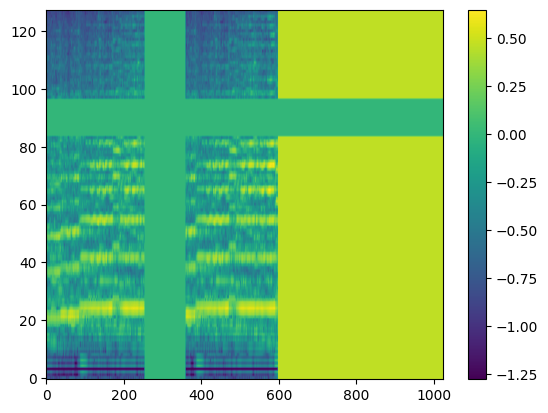

In [106]:
# Display the spectrogram using matplotlib with viridis color map and no axes
plt.imshow(sample, aspect='auto', origin='lower', cmap='viridis')
plt.axis('on') # remove the x- and y-axis and tick labels
plt.colorbar() # adds a color bar to the plot
plt.show()